In [72]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [67]:
file_path = 'data/world_bank_projects.json'
with open(file_path) as file:
    r = json.load(file)

In [117]:
df = pd.read_json(file_path)

In [18]:
df.head()

_id  approvalfy board_approval_month  \
0  {'$oid': '52b213b38594d8a2be17c780'}        1999             November   
1  {'$oid': '52b213b38594d8a2be17c781'}        2015             November   
2  {'$oid': '52b213b38594d8a2be17c782'}        2014             November   
3  {'$oid': '52b213b38594d8a2be17c783'}        2014              October   
4  {'$oid': '52b213b38594d8a2be17c784'}        2014              October   

      boardapprovaldate                                 borrower  \
0  2013-11-12T00:00:00Z  FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA   
1  2013-11-04T00:00:00Z                    GOVERNMENT OF TUNISIA   
2  2013-11-01T00:00:00Z   MINISTRY OF FINANCE AND ECONOMIC DEVEL   
3  2013-10-31T00:00:00Z   MIN. OF PLANNING AND INT'L COOPERATION   
4  2013-10-31T00:00:00Z                      MINISTRY OF FINANCE   

            closingdate                              country_namecode  \
0  2018-07-07T00:00:00Z  Federal Democratic Republic of Ethiopia!$!ET   
1                   NaN                      Republic of Tunisia!$!TN   
2                   NaN                                   Tuvalu!$!TV   
3                   NaN                        Republic of Yemen!$!RY   
4  2019-04-30T00:00:00Z                       Kingdom of Lesotho!$!LS   

  countrycode                              countryname    countryshortname  \
0          ET  Federal Democratic Republic of Ethiopia            Ethiopia   
1          TN                      Republic of Tunisia             Tunisia   
2          TV                                   Tuvalu              Tuvalu   
3          RY                        Republic of Yemen  Yemen, Republic of   
4          LS                       Kingdom of Lesotho             Lesotho   

   ...   sectorcode source  status  supplementprojectflg  \
0  ...  ET,BS,ES,EP   IBRD  Active                     N   
1  ...        BZ,BS   IBRD  Active                     N   
2  ...           TI   IBRD  Active                     Y   
3  ...           JB   IBRD  Active                     N   
4  ...     FH,YW,YZ   IBRD  Active                     N   

                                              theme1  \
0      {'Percent': 100, 'Name': 'Education for all'}   
1  {'Percent': 30, 'Name': 'Other economic manage...   
2    {'Percent': 46, 'Name': 'Regional integration'}   
3  {'Percent': 50, 'Name': 'Participation and civ...   
4  {'Percent': 30, 'Name': 'Export development an...   

                                      theme_namecode    themecode   totalamt  \
0      [{'code': '65', 'name': 'Education for all'}]           65  130000000   
1  [{'code': '24', 'name': 'Other economic manage...        54,24          0   
2  [{'code': '47', 'name': 'Regional integration'...  52,81,25,47    6060000   
3  [{'code': '57', 'name': 'Participation and civ...        59,57          0   
4  [{'code': '45', 'name': 'Export development an...        41,45   13100000   

  totalcommamt                                                url  
0    130000000  http://www.worldbank.org/projects/P129828/ethi...  
1      4700000  http://www.worldbank.org/projects/P144674?lang=en  
2      6060000  http://www.worldbank.org/projects/P145310?lang=en  
3      1500000  http://www.worldbank.org/projects/P144665?lang=en  
4     13100000  http://www.worldbank.org/projects/P144933/seco...  

[5 rows x 50 columns]

In [94]:
# Count number of projects for each country by countryshortname
country = df.countryshortname.value_counts().head(10)
country

Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Bangladesh            12
Morocco               12
Nepal                 12
Mozambique            11
Africa                11
Name: countryshortname, dtype: int64

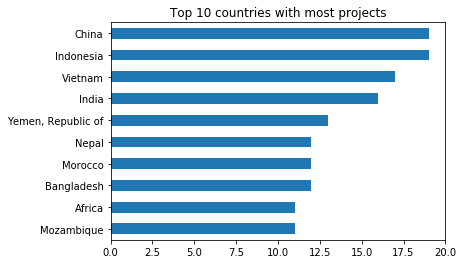

In [95]:
#visualize top 10 countries with most projects
country.sort_values(ascending=True).plot(kind='barh', title='Top 10 countries with most projects', xlim=(0,20))
plt.show()

In [128]:
# create empty dict for theme_count using theme code
theme_count = {}
# create empty dict to record available theme name for each code in order to fill in empty theme name later
theme_name = {}
# loop over each project and each theme
for list in df['mjtheme_namecode']:
    for dict in list:
        # check if theme code in theme_count and complete counter
        if dict['code'] in theme_count.keys():
            theme_count[dict['code']] += 1
        else: 
            theme_count[dict['code']] =1
        # check if name is available and added name to theme_name
        if (dict['code'] not in theme_name.keys()) and dict['name'] != '':
            theme_name[dict['code']] = dict['name']
# sort theme_count with descending order
sorted_theme_count = sorted(theme_count.items(), key = lambda x:x[1], reverse = True)
# replace theme code with theme name for readibility
theme_name_count = [(theme_name[x],y) for x, y in sorted_theme_count[:10]]
theme_name_count

[('Environment and natural resources management', 250),
 ('Rural development', 216),
 ('Human development', 210),
 ('Public sector governance', 199),
 ('Social protection and risk management', 168),
 ('Financial and private sector development', 146),
 ('Social dev/gender/inclusion', 130),
 ('Trade and integration', 77),
 ('Urban development', 50),
 ('Economic management', 38)]

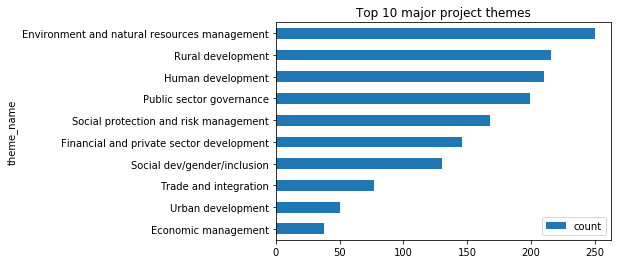

In [131]:
# visualize top 10 major project themes
df_theme = pd.DataFrame(theme_name_count)
df_theme.columns = ['theme_name', 'count']
df_theme.sort_values(by='count', ascending=True).plot(kind='barh', x='theme_name',label=None, title='Top 10 major project themes')
plt.show()

In [112]:
# copy original dataframe to a new one for filling empty theme name
df_filled = df.copy()
# loop over themes and filled empty name from theme_name dict
for list in df_filled['mjtheme_namecode']:
    for dict in list:
        if dict['name'] == '':
            dict['name'] = theme_name[dict['code']]

In [125]:
# dataframe inspect and comparison
df['mjtheme_namecode'][5]

[{'code': '6', 'name': 'Social protection and risk management'},
 {'code': '6', 'name': ''}]

In [126]:
df_filled['mjtheme_namecode'][5]

[{'code': '6', 'name': 'Social protection and risk management'},
 {'code': '6', 'name': 'Social protection and risk management'}]